In [3]:
import math
import sys
sys.path.append('/Users/vikaspandey/my_projects/deeplearning_ai')
import numpy as np
import pandas as pd
import seaborn as sns
from utils.utils import load_data_from_csv_as_np
from data_visualisation.plot.utils import show_image

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline

np.random.seed(2)



Using TensorFlow backend.


In [2]:
#train_X, train_Y, test_data = load_data_from_csv_as_np(1, dir="digit_recognizer", dtype='int')

data = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/datasets/494766/1082591/covid_19_clean_complete.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587250271&Signature=ju4H%2Fvtdd%2FZu1SBgZ0P%2BZjxIE8oble%2B29QrzHnvRYkzWAmEABja%2BmKTlDwEHnJoDGO83ag1ukX6Y39b4Zr3m7lDM4tC5%2Bj7BAMB4dmHCo8%2F0wmAaq%2BrOj%2FnM0Zge5t7Dh6Fxi4Gtlu7%2B%2F8JWEt5%2FXgXOR2pLLpqOkGXpdlJUfCJSkDtep4g6y%2Fb%2BAhLmYEJNodJcZrouj6RnulzHMGO5RZrJdbs%2FCDQvOluh6ouhM%2BPl4RZRl2cAjwf311S9QevDufd%2FxAn%2B%2FUbmT1ZSBy57QXYI6T4Cho8kyWNvRpAQkgESuQ4C29ET9RteOavqf%2FVHd%2FN9CpFMt7ztKkgpCMizUw%3D%3D&response-content-disposition=attachment%3B+filename%3Dcovid_19_clean_complete.csv")

NameError: name 'pd' is not defined

In [18]:
train_X = train_X/255.
test = test_data/255.

In [20]:
train_X = train_X.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

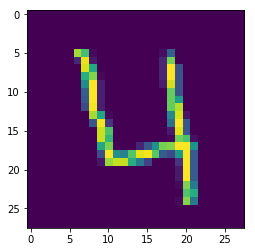

In [29]:
show_image(train_X[3][:, :, 0])

In [31]:
train_Y = to_categorical(train_Y, num_classes=10)

In [33]:
train_Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [46]:
random_seed = 2
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.1, random_state=random_seed)

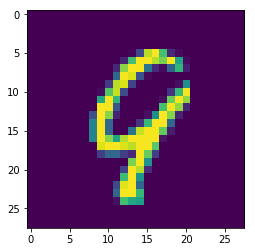

In [47]:
show_image(train_X[0][:,:,0])

In [54]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))